In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import geometric_sampling as gs
import matplotlib.pyplot as plt

In [ ]:
rng = gs.random.rng(42)
N = 200
n = 4
y_features = rng.cluster_coordinates(2, 0.05, size=(N, 2))
y_features_new = (y_features - y_features.min(axis=0)) / y_features.max(axis=0)
x_features = rng.unequal_probabilities(n, N)

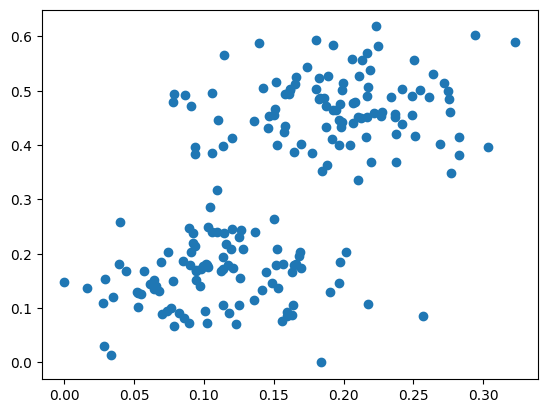

In [7]:
plt.scatter(y_features_new[:, 0], y_features_new[:, 1])

In [51]:
rng = gs.random.rng(42)
N = 200
n = 4
weights = np.array([0.5, 0.5])
y_features_ran = rng.random_coordinates((N, 2))
x_features = rng.random_coordinates(N).reshape(-1, 1)
x_features_norm = (x_features - x_features.mean(axis=0)) / x_features.std(axis=0)

In [54]:
agg = gs.clustering.Agg(n)
agg.fit(y_features_ran, x_features_norm, weights)


iter: 0
Ti [-6.31521957  0.97118094 -6.64085876 11.98489739]


cost
[[5.67158622e-05 1.79000000e+02 2.00000000e+00 3.00000000e+00]
 [1.11918811e-04 1.18000000e+02 2.00000000e+00 3.00000000e+00]
 [1.18322268e-04 1.91000000e+02 1.00000000e+00 3.00000000e+00]
 [1.18607911e-04 1.52000000e+02 1.00000000e+00 3.00000000e+00]
 [1.60655154e-04 3.90000000e+01 3.00000000e+00 2.00000000e+00]
 [1.61161462e-04 2.80000000e+01 2.00000000e+00 3.00000000e+00]
 [1.61739906e-04 1.76000000e+02 3.00000000e+00 2.00000000e+00]
 [1.64928021e-04 1.90000000e+02 3.00000000e+00 2.00000000e+00]
 [1.83531703e-04 1.88000000e+02 1.00000000e+00 3.00000000e+00]
 [1.83551644e-04 3.10000000e+01 3.00000000e+00 2.00000000e+00]]


iter: 1
Ti [-6.31521957  0.97118094 -6.11173297 11.4557716 ]


cost
[[ -2.72010103  18.           0.           2.        ]
 [ -2.70426123 124.           0.           2.        ]
 [ -2.34705771  35.           0.           2.        ]
 [ -2.3183019  115.           0.           2.        ]
 [ -2.2905

---

In [22]:
i = 1
iprim = 0

a = 4 * np.sum(weights[None, :] * x_features_norm**2, axis=1)
b = -4 * np.sum(
    weights[None, :] * x_features_norm * (agg.Ti[i] - agg.Ti[iprim]), axis=1
)
c = np.sum(weights * (agg.Ti[i] - agg.Ti[iprim]) ** 2)
c = np.full(N, c)

In [41]:
p = -b / (2 * a)
np.where(np.logical_and(p < 1, p > 0)), p[np.logical_and(p < 1, p > 0)]

((array([  4,   6,  22,  69, 151, 161]),),
 array([0.88871963, 0.3344044 , 0.50400431, 0.54949186, 0.72125617,
        0.32871958]))

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def plot_parabolas(a_vals, b_vals, c_vals, x_range=(-10, 10), num_points=400):
    """
    Plots multiple parabolas given arrays of coefficients a, b, and c.

    Parameters:
    - a_vals: List or array of 'a' coefficients.
    - b_vals: List or array of 'b' coefficients.
    - c_vals: List or array of 'c' coefficients.
    - x_range: Tuple (x_min, x_max) defining the x range.
    - num_points: Number of points to sample in the x range.
    """
    if not (len(a_vals) == len(b_vals) == len(c_vals)):
        raise ValueError("Arrays a_vals, b_vals, and c_vals must have the same length")

    x = np.linspace(x_range[0], x_range[1], num_points)
    plt.figure(figsize=(8, 6))

    for i, (a, b, c) in enumerate(zip(a_vals, b_vals, c_vals)):
        y = a * x**2 + b * x + c
        plt.plot(x, y, label=f"Parabola {i+1}: {a}x² + {b}x + {c}")

    plt.axhline(0, color="black", linewidth=0.5)
    plt.axvline(0, color="black", linewidth=0.5)
    plt.grid(True, linestyle="--", linewidth=0.5)
    # plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Plot of Quadratic Functions")
    plt.show()

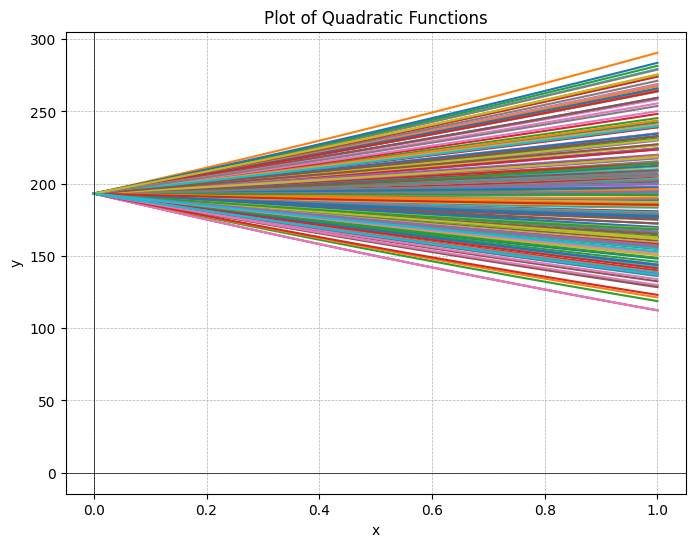

In [44]:
num = 200
plot_parabolas(a[:num], b[:num], c[:num], x_range=(0, 1))